A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


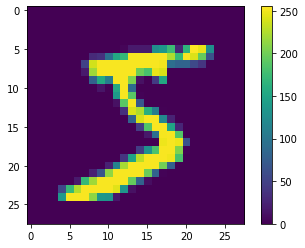

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Normalizando

In [6]:
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.max(): 255
x_train.min(): 0
x_test.max(): 255
x_test.min(): 0


In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.max(): 1.0
x_train.min(): 0.0
x_test.max(): 1.0
x_test.min(): 0.0


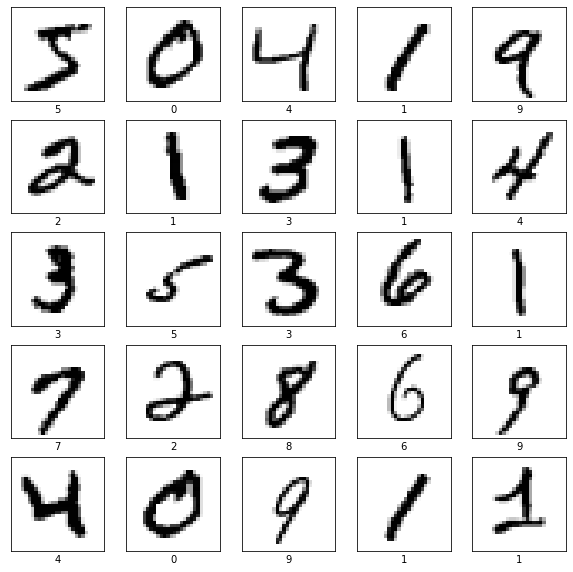

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [10]:
x_train[0].shape

(28, 28)

In [11]:
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28)


In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [13]:
model1 = models.Sequential()

model1.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(28,28,1)))
model1.add(layers.MaxPooling2D(pool_size = (2,2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(32))
model1.add(layers.Dense(10, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                43296     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
____________________________________________________

In [14]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3412 - accuracy: 0.8986
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1983 - accuracy: 0.9411
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1599 - accuracy: 0.9517
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1422 - accuracy: 0.9563
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1294 - accuracy: 0.9598
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1215 - accuracy: 0.9628
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1161 - accuracy: 0.9636
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1114 - accuracy: 0.9648
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1056 - accuracy: 0.9671
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - los

---
# Modelo 2

In [22]:
model2 = models.Sequential()

model2.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(28,28,1)))
model2.add(layers.MaxPooling2D(pool_size = (2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16))
model2.add(layers.Dense(32))
model2.add(layers.Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                21648     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [23]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3330 - accuracy: 0.9014
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1956 - accuracy: 0.9421
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1626 - accuracy: 0.9511
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1461 - accuracy: 0.9556
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1336 - accuracy: 0.9596
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1257 - accuracy: 0.9620
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1177 - accuracy: 0.9638
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1160 - accuracy: 0.9642
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1121 - accuracy: 0.9649
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - lo

## Evaluación de los modelos

In [25]:
x_test = x_test.reshape(10000, 28, 28, 1)
print('x_test.shape:', x_test.shape)

x_test.shape: (10000, 28, 28, 1)


In [25]:
test_loss1, test_acc1 = model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0857 - accuracy: 0.9738


In [26]:
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0760 - accuracy: 0.9756


## Predicciones

In [27]:
predictions1 = model1.predict(x_test)

In [28]:
predictions2 = model2.predict(x_test)

In [29]:
predictions1[0]

array([5.8637733e-07, 5.8877028e-08, 1.4339022e-05, 1.3241681e-04,
       2.1619901e-08, 2.8677411e-08, 2.5538354e-11, 9.9982351e-01,
       1.3254144e-07, 2.8890910e-05], dtype=float32)

In [30]:
predictions2[0]

array([1.4983840e-08, 5.9764949e-09, 3.3278627e-06, 3.8705225e-04,
       3.5400491e-10, 3.8088750e-09, 8.3586160e-13, 9.9960417e-01,
       6.4496739e-08, 5.4372181e-06], dtype=float32)

In [34]:
y_test[0]

7

In [59]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Gráfica para modelo 1

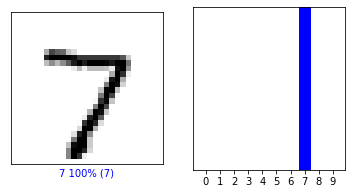

In [114]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  y_test)
plt.show()

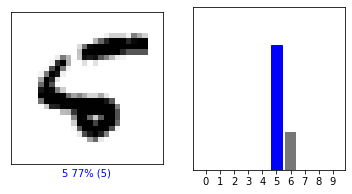

In [60]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  y_test)
plt.show()

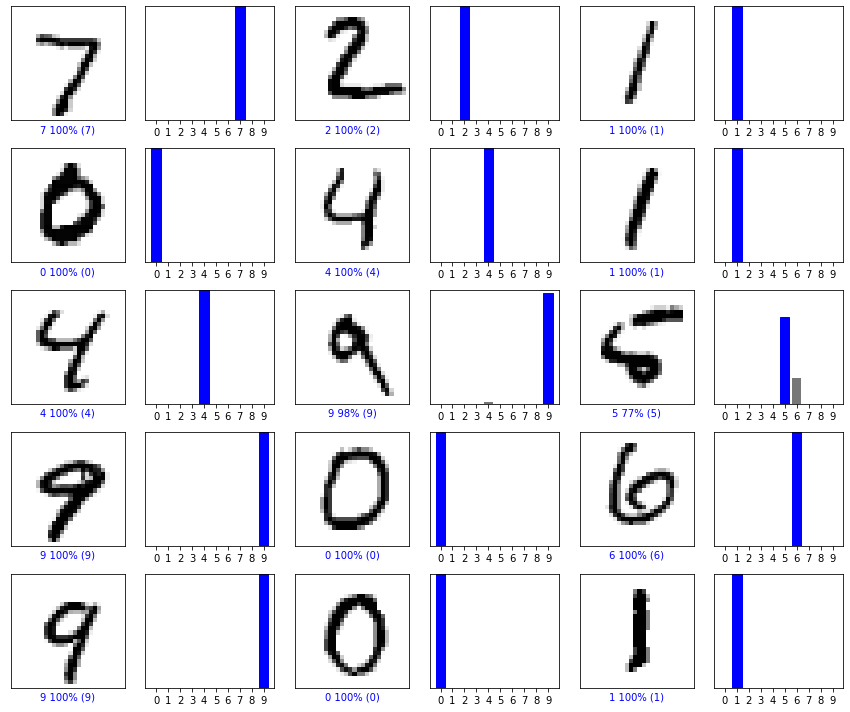

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions1[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions1[i], y_test)
plt.tight_layout()
plt.show()

## Gráfica para modelo 2

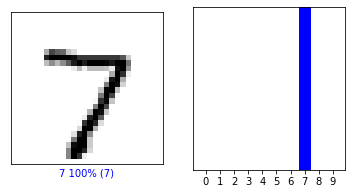

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  y_test)
plt.show()

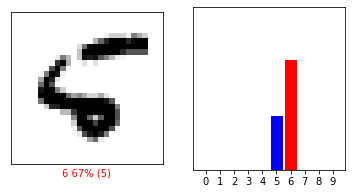

In [48]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  y_test)
plt.show()

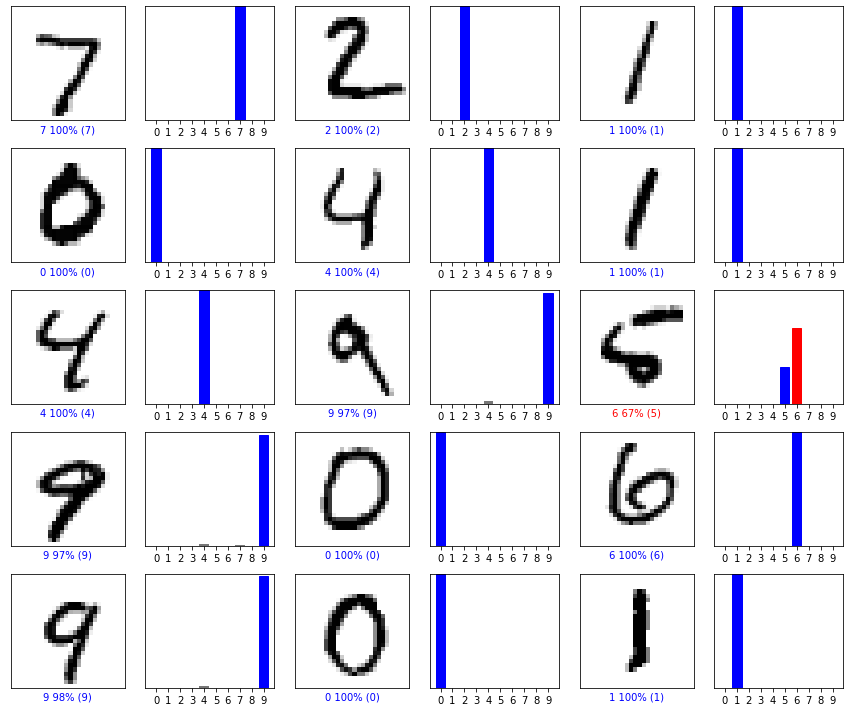

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2[i], y_test)
plt.tight_layout()
plt.show()